In [ ]:
# Import Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")


Load the data

In [ ]:
# Load data from csv
data_df = pd.read_csv("train.csv")
data_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

# New section

In [ ]:
data_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [ ]:
data_df.shape

(1460, 81)

In [ ]:
## Replacing all 'NA' of all above mentioned columns by 'None'
data_df[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']] = data_df[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']].replace("NA", "None")
data_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [ ]:
data_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:

#
#data_df['LotFrontage'] = pd.to_numeric(data_df['LotFrontage'], errors='coerce')
#data_df['MasVnrArea'] = pd.to_numeric(data_df['MasVnrArea'], errors='coerce')

In [ ]:
pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 64.4 MB/s eta 0:00:00


In [ ]:
#Auto EDA
import sweetviz as sv
sweet_report = sv.analyze(data_df,pairwise_analysis="off")
sweet_report.show_html('sweet_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
data_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

<Axes: xlabel='SalePrice', ylabel='Density'>

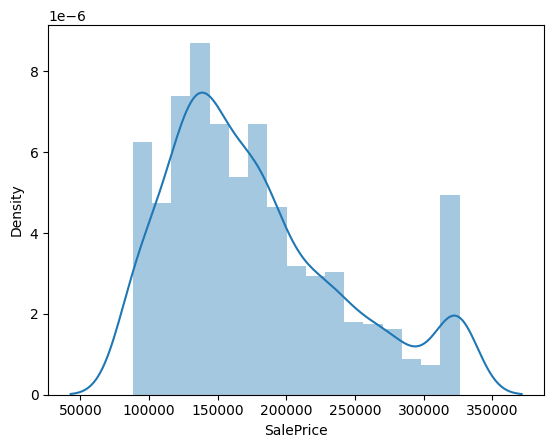

In [ ]:
sns.distplot(data_df['SalePrice'])

In [ ]:
#Check for NUll data
data_df.isnull().sum()[data_df.isnull().sum()>0]



LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [ ]:
#drop columns with missing values
data_df=data_df.drop(columns=['Alley','PoolQC','Fence','MiscFeature'])

In [ ]:
data_df.shape


(1460, 77)

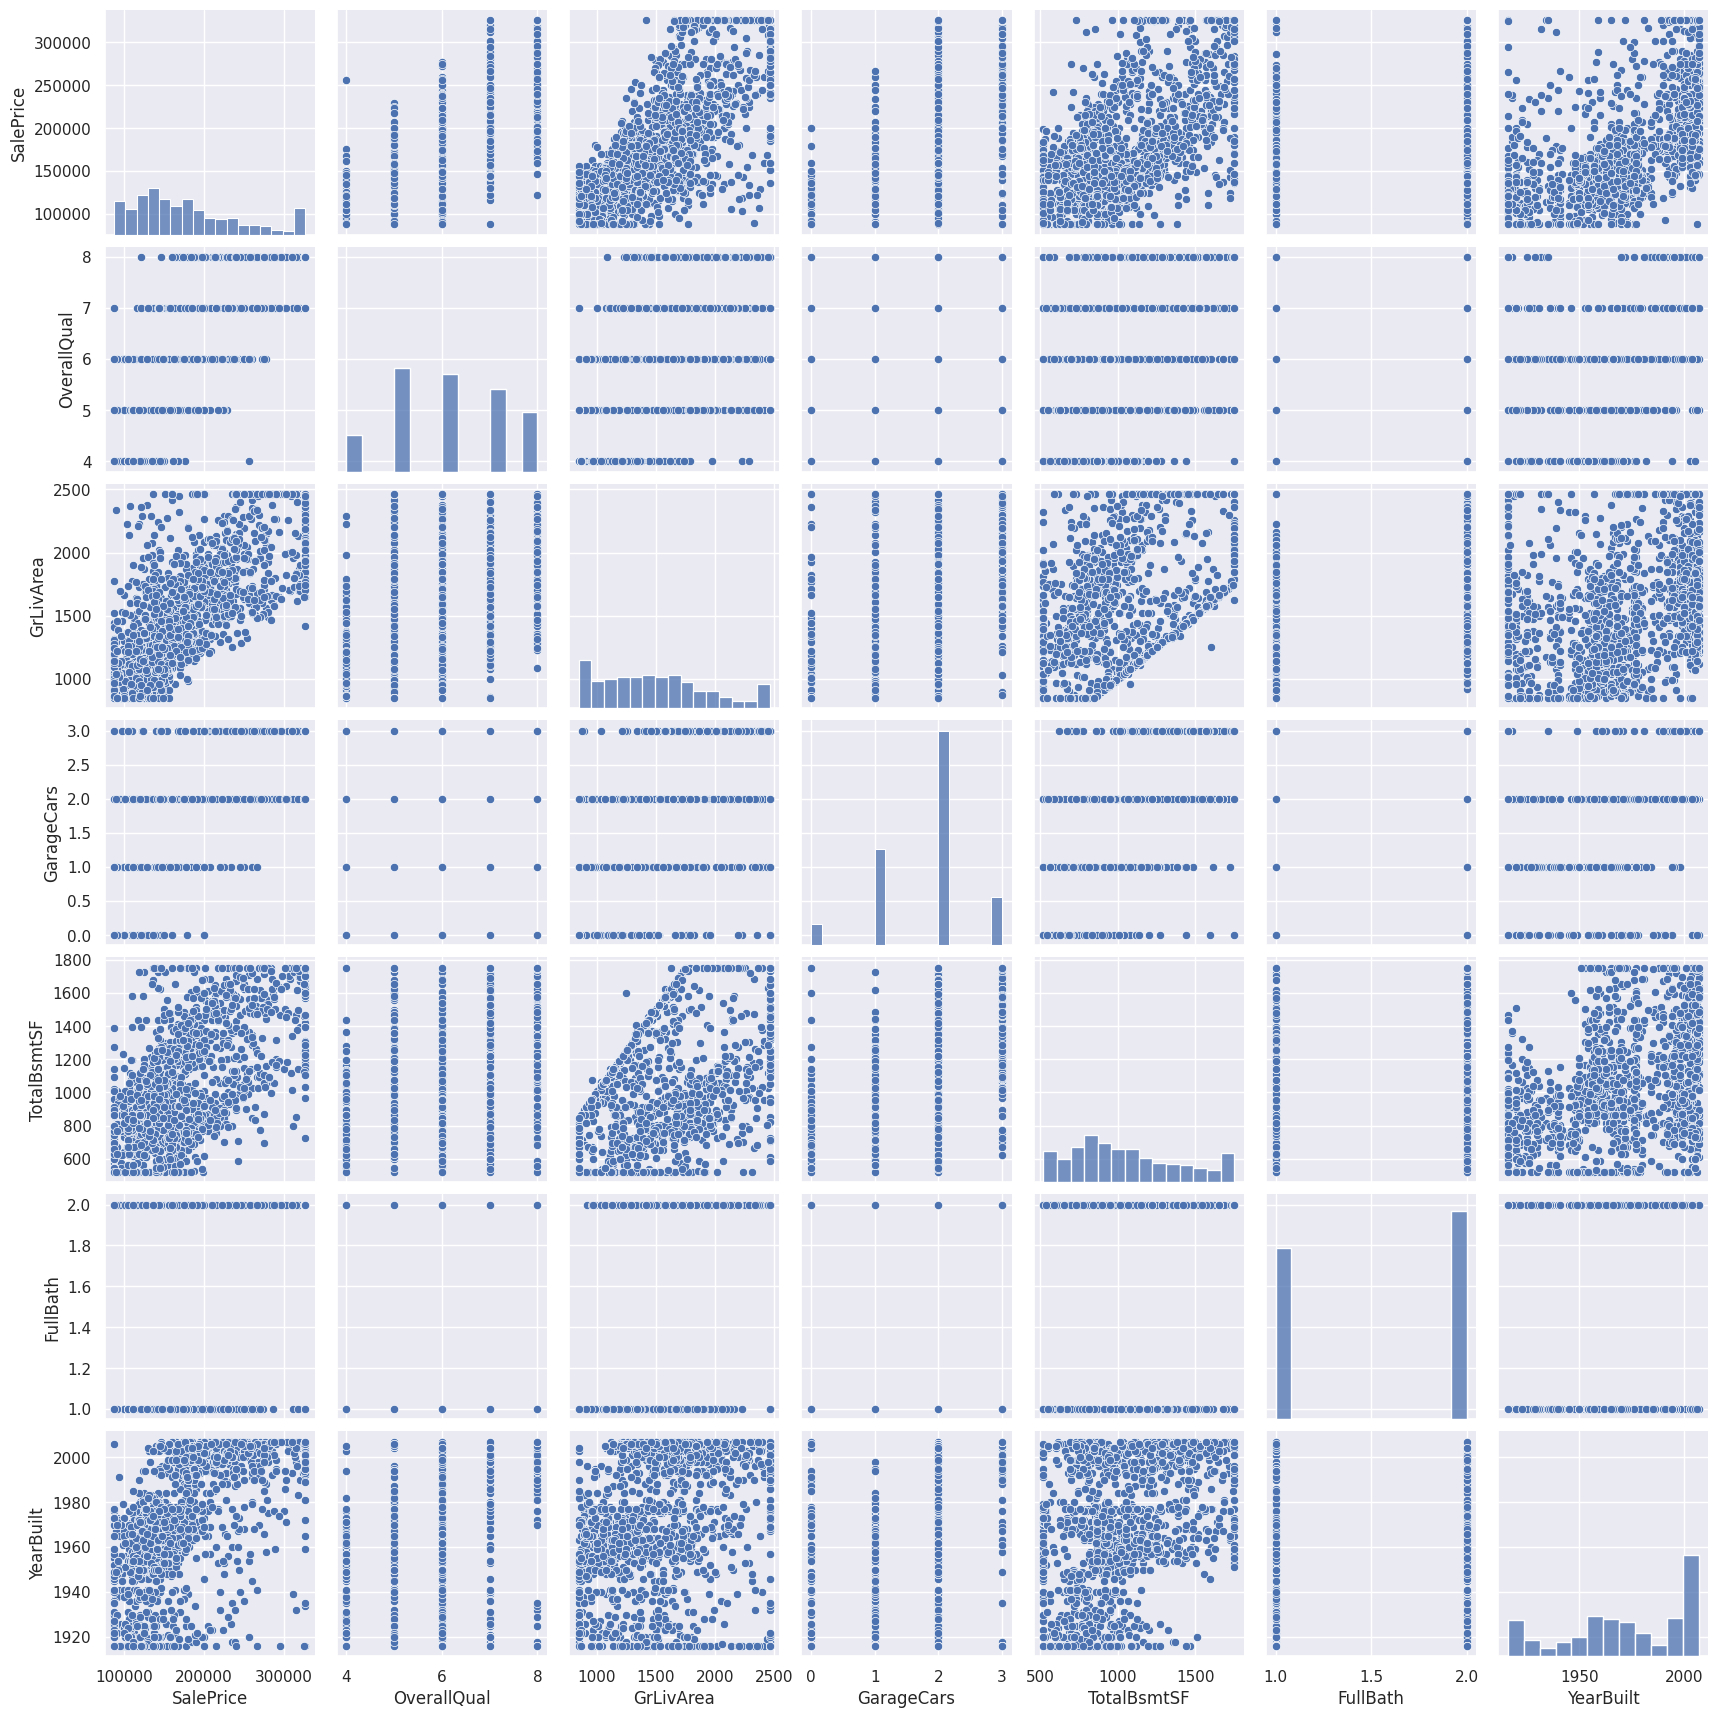

In [ ]:
for col in data_df.columns:
    if data_df[col].dtype == np.object :
        print(col)
        print(data_df[col].value_counts(normalize=True))

MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64
Street
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64
LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64
Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64
LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64
LandSlope
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlope, dtype: float64
Neighborhood
NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.034932
Mitchel    0.

In [ ]:
#Drop columns with more biased data
data_df=data_df.drop(columns=['Id','Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond'
                                    ,'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond'
                                    , 'PavedDrive', 'Condition1', 'BldgType', 'ExterCond', 'BsmtFinType2', 'SaleType'
                                    , 'SaleCondition'])

In [ ]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(data_df[cols], size = 2.5)
plt.show();

In [ ]:
print("Skewness: %f" % data_df['SalePrice'].skew())
print("Kurtosis: %f" % data_df['SalePrice'].kurt())

Skewness: 0.809361
Kurtosis: -0.134864


In [ ]:
#impute missing values of LotFrontage with median due to some outliers in data shown from Descibe section
data_df.LotFrontage = data_df.LotFrontage.fillna(data_df.LotFrontage.median())

In [ ]:
#impute missing values of MasVnrArea with median due to some outliers in data shown from Descibe section
data_df.MasVnrArea = data_df.MasVnrArea.fillna(data_df.MasVnrArea.median())

In [ ]:
data_df.columns


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 56 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   HouseStyle     1460 non-null   object 
 8   OverallQual    1460 non-null   int64  
 9   OverallCond    1460 non-null   int64  
 10  YearBuilt      1460 non-null   int64  
 11  YearRemodAdd   1460 non-null   int64  
 12  RoofStyle      1460 non-null   object 
 13  Exterior1st    1460 non-null   object 
 14  Exterior2nd    1460 non-null   object 
 15  MasVnrType     1452 non-null   object 
 16  MasVnrArea     1460 non-null   float64
 17  ExterQual      1460 non-null   object 
 18  Foundati

In [ ]:
data_df.MasVnrArea = data_df.MasVnrArea.fillna('None')
data_df.MasVnrType = data_df.MasVnrType.fillna('None')
data_df.BsmtQual = data_df.BsmtQual.fillna('No')
data_df.BsmtExposure = data_df.BsmtExposure.fillna('No')
data_df.BsmtFinType1 = data_df.BsmtFinType1.fillna('NA')
data_df.GarageYrBlt = data_df.GarageYrBlt.fillna(0)
data_df.GarageType = data_df.GarageType.fillna('NA')

data_df.FireplaceQu = data_df.FireplaceQu.fillna('NA')
data_df.GarageFinish = data_df.GarageFinish.fillna('NA')


In [ ]:
#Verify we dont have any null value
data_df.isnull().values.any()

False

In [ ]:
data_df.LotFrontage.value_counts()


69.0     270
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

In [ ]:
#data_df.FireplaceQu.unique (axis=0)

In [ ]:
data_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [ ]:
#replace Nan values of FireplaceQu with NA i.e. No Fireplace
#data_df = data_df.fillna('NA')

In [ ]:
## Extract numerical columns
df_num = data_df.select_dtypes(include=['int64', 'float64'])
df_num.head()



MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0          2003       196.0         706           0  ...           0   
1          1976         0.0         978           0  ...         298   
2          2002       162.0         486           0  ...           0   
3          1970         0.0         216           0  ...           0   
4          2000       350.0         655           0  ...         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008     208500  
1       5    2007     181500  
2       9    2008     223500  
3       2    2006     140000  
4      12    2008     250000  

[5 rows x 37 columns]

In [ ]:
## Extract categorical columns
df_cat = data_df.select_dtypes(include='object')
df_cat.head()

MSZoning LotShape LotConfig Neighborhood HouseStyle RoofStyle Exterior1st  \
0       RL      Reg    Inside      CollgCr     2Story     Gable     VinylSd   
1       RL      Reg       FR2      Veenker     1Story     Gable     MetalSd   
2       RL      IR1    Inside      CollgCr     2Story     Gable     VinylSd   
3       RL      IR1    Corner      Crawfor     2Story     Gable     Wd Sdng   
4       RL      IR1       FR2      NoRidge     2Story     Gable     VinylSd   

  Exterior2nd MasVnrType ExterQual Foundation BsmtQual BsmtExposure  \
0     VinylSd    BrkFace        Gd      PConc       Gd           No   
1     MetalSd       None        TA     CBlock       Gd           Gd   
2     VinylSd    BrkFace        Gd      PConc       Gd           Mn   
3     Wd Shng       None        TA     BrkTil       TA           No   
4     VinylSd    BrkFace        Gd      PConc       Gd           Av   

  BsmtFinType1 HeatingQC KitchenQual FireplaceQu GarageType GarageFinish  
0          GLQ        Ex          Gd          NA     Attchd          RFn  
1          ALQ        Ex          TA          TA     Attchd          RFn  
2          GLQ        Ex          Gd          TA     Attchd          RFn  
3          ALQ        Gd          Gd          Gd     Detchd          Unf  
4          GLQ        Ex          Gd          TA     Attchd          RFn

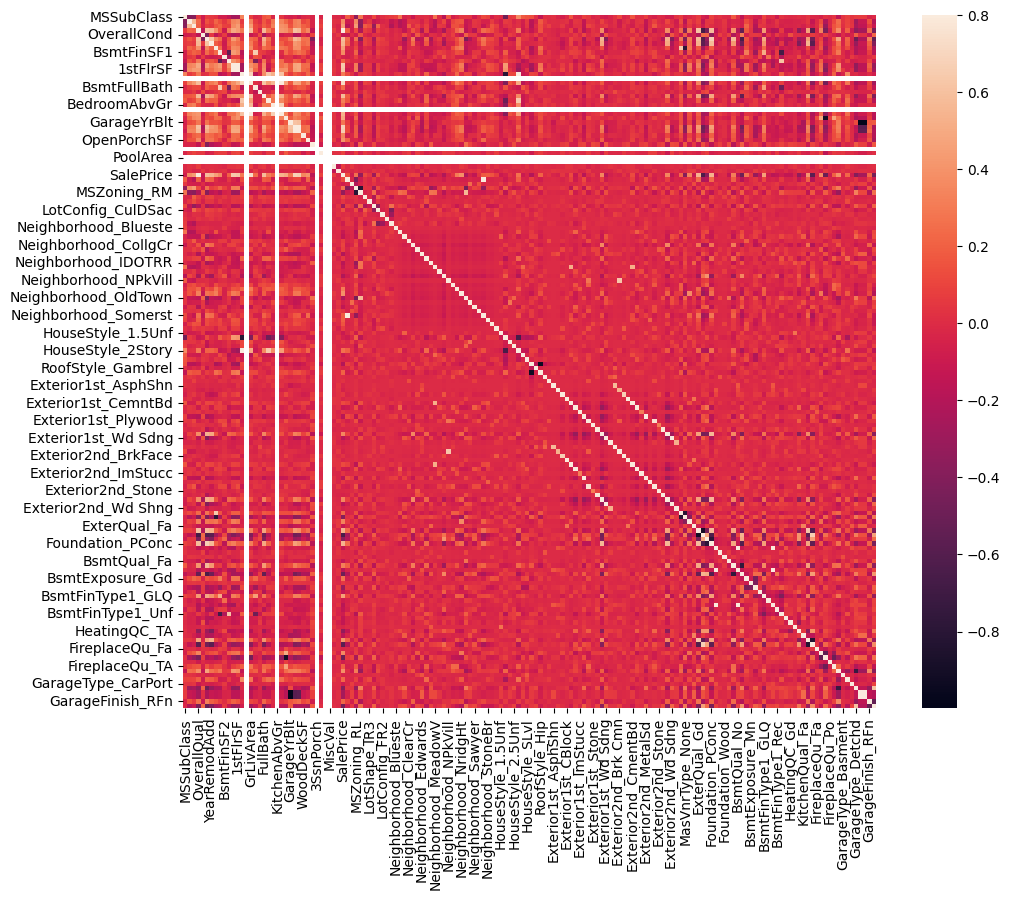

In [ ]:
#correlation matrix
corrmat = data_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

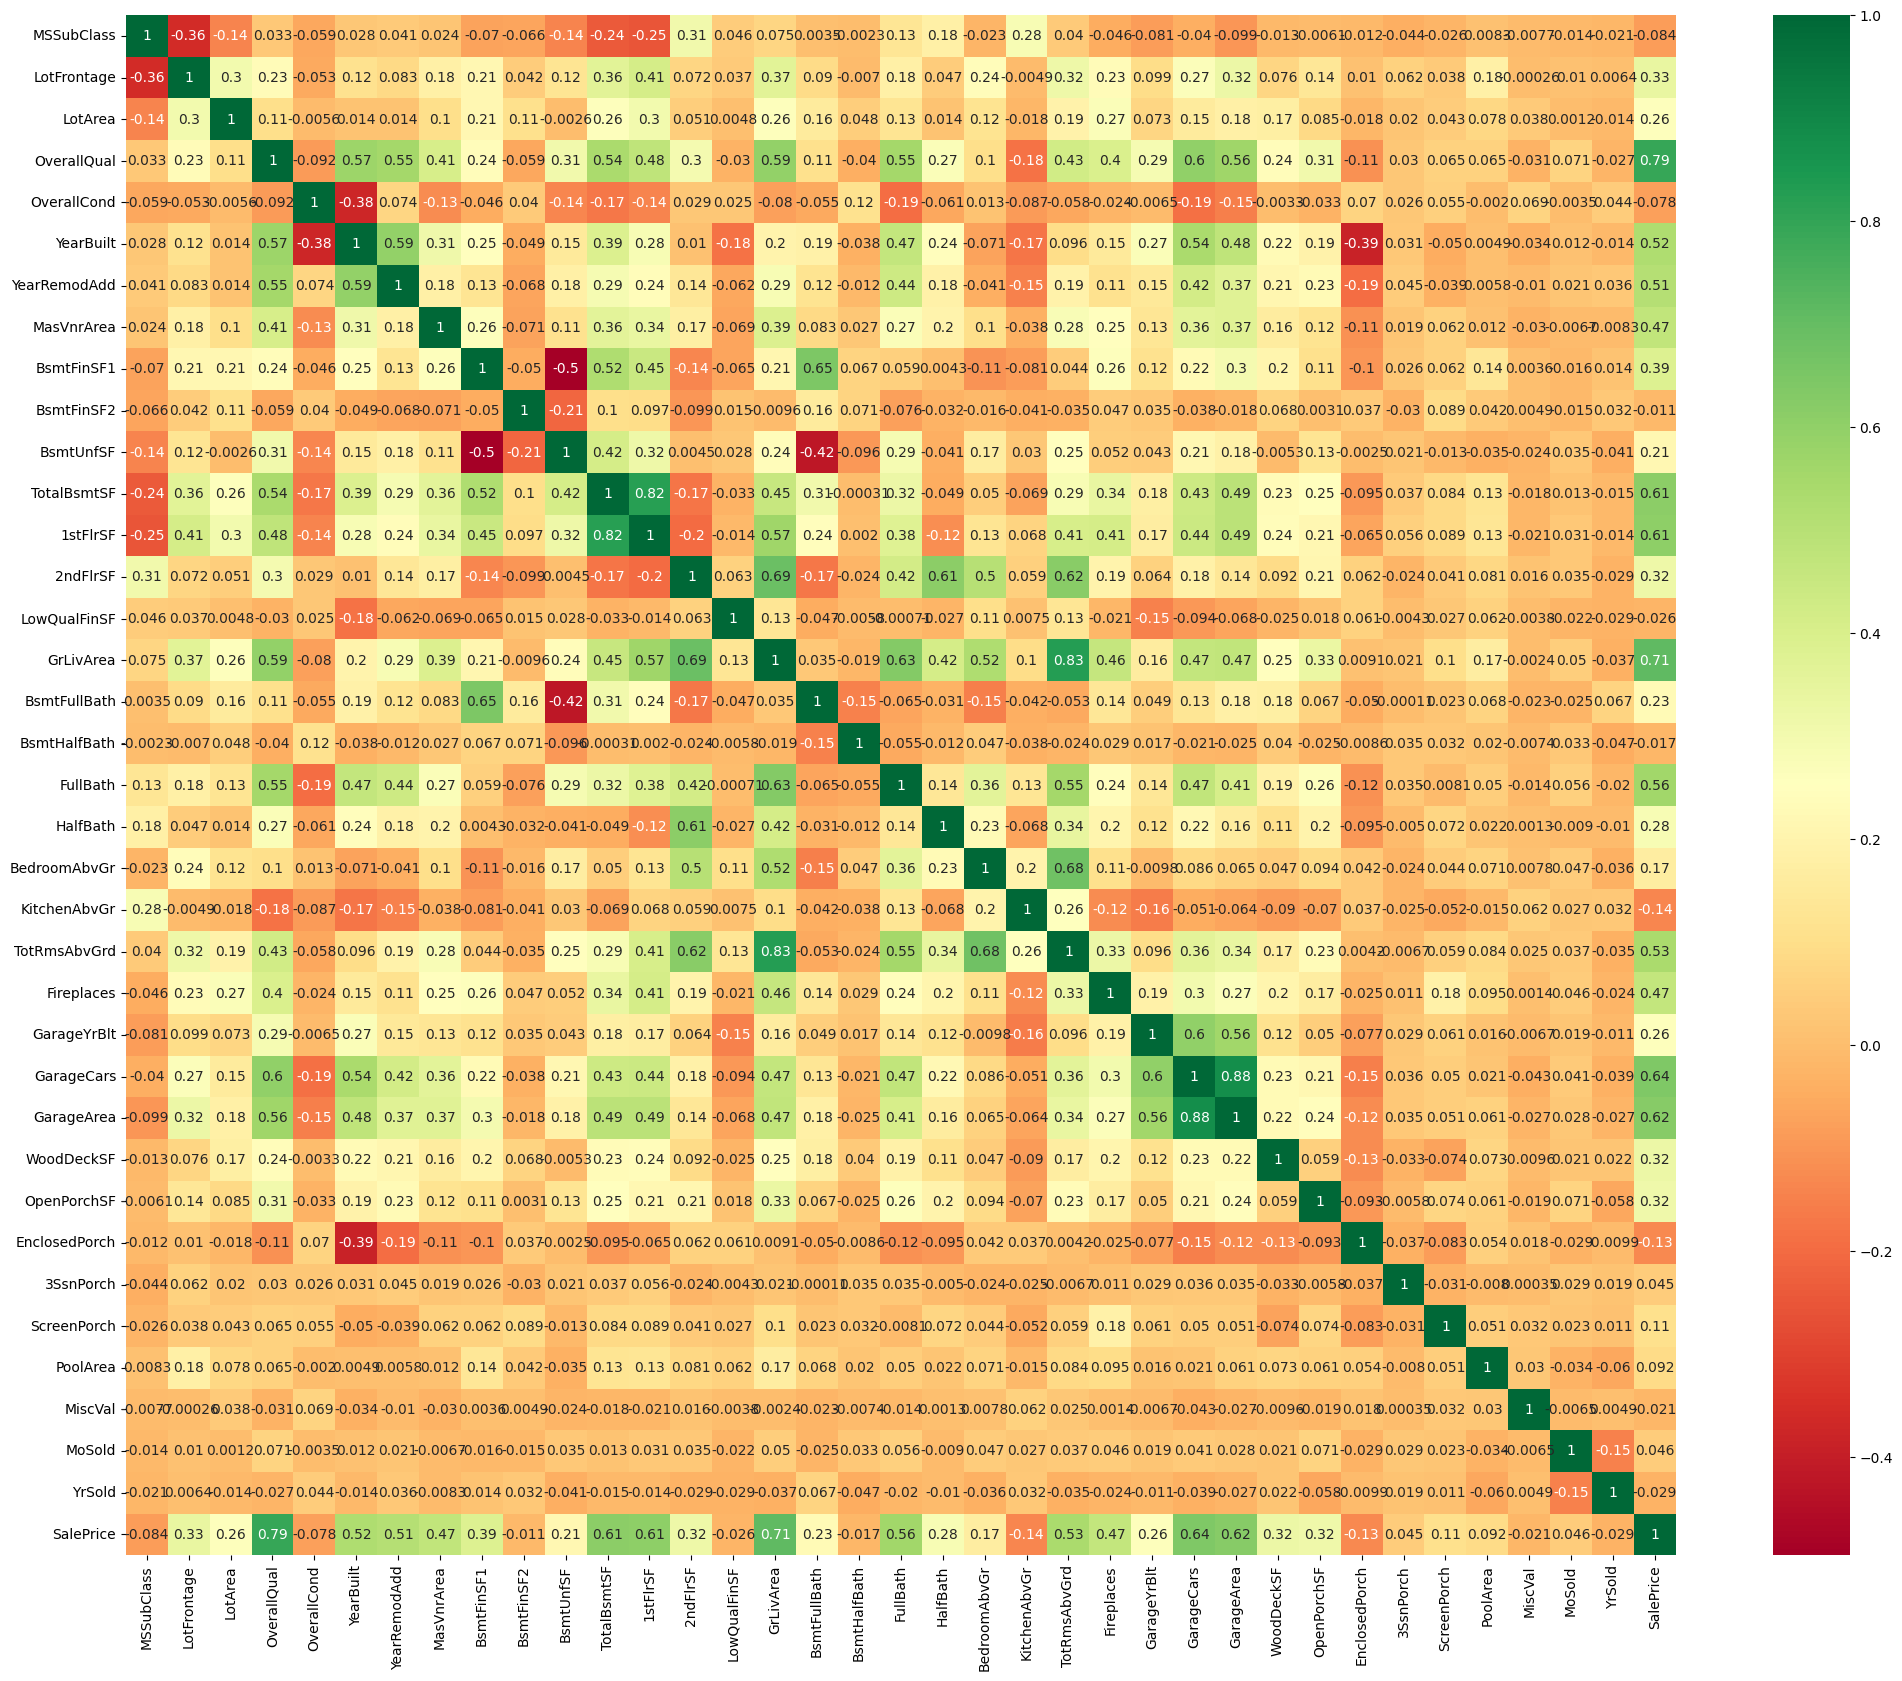

In [ ]:
# Plot heatmap to detect correlations among numerical variables
plt.figure(figsize=(25,20))
sns.heatmap(df_num.corr(), annot=True, cmap='RdYlGn');

->Many columns are highly correlated with each other.
->Target variable SalePrice is highly correlated with GrLivArea, GarageCars and GarageArea.
->As there is multicollinearity among predictors in our data, it would be good to use Ridge Regression.

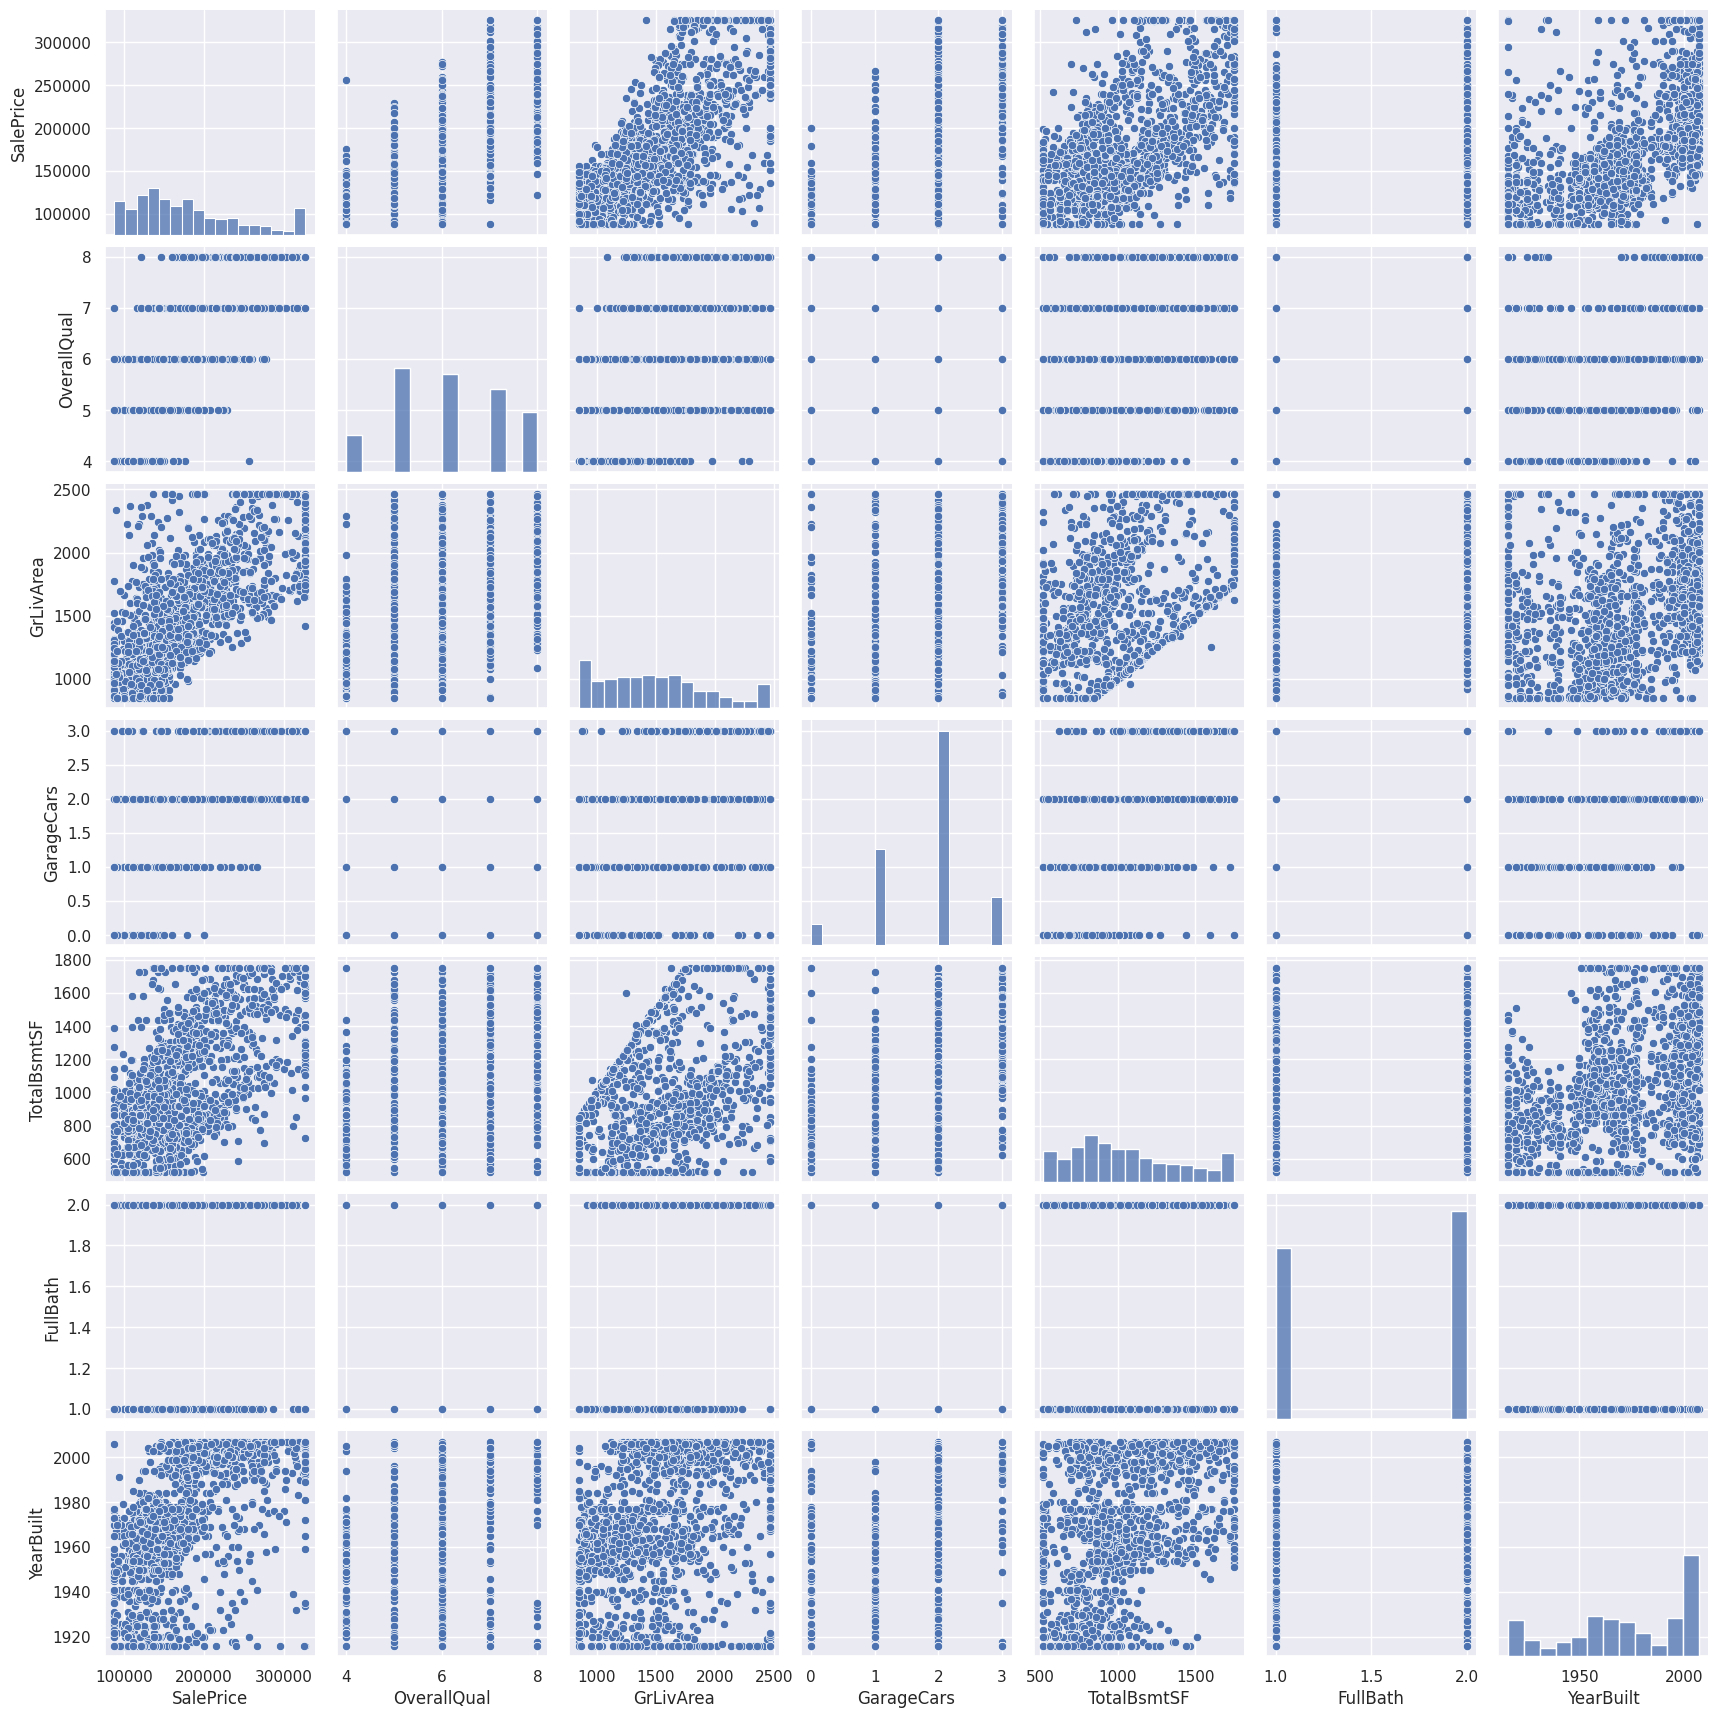

In [ ]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(data_df[cols], size = 2.5)
plt.show();

In [ ]:
data_df.shape

(1460, 56)

In [ ]:
df_cat.shape

(1460, 19)

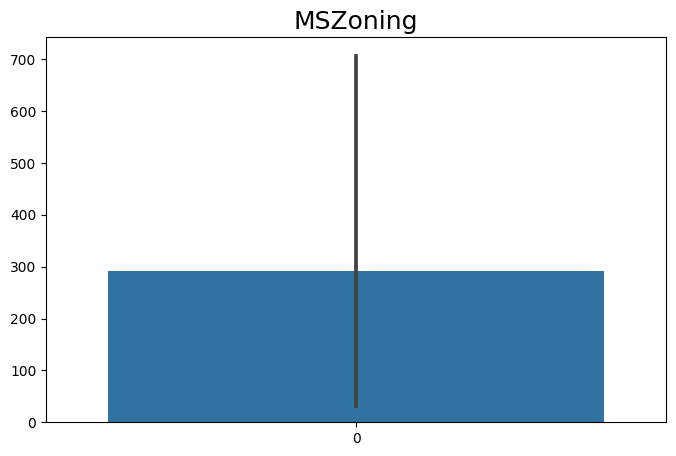

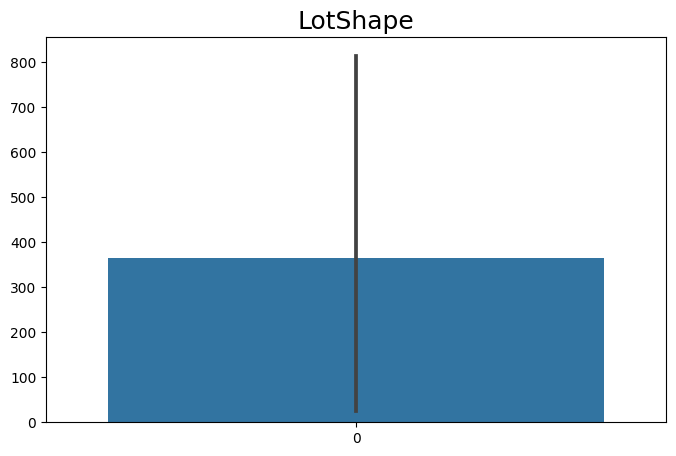

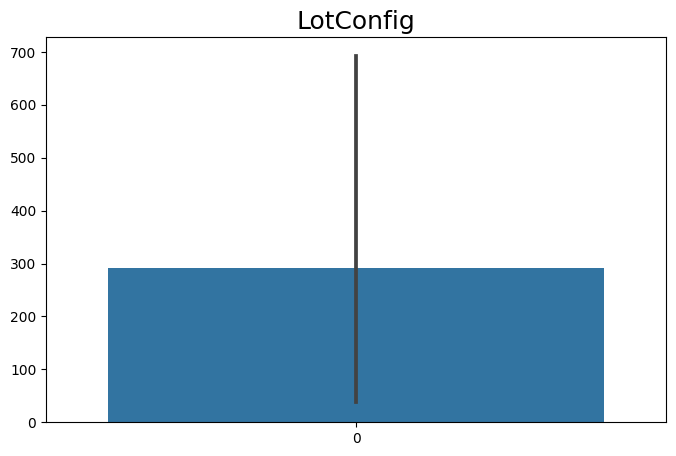

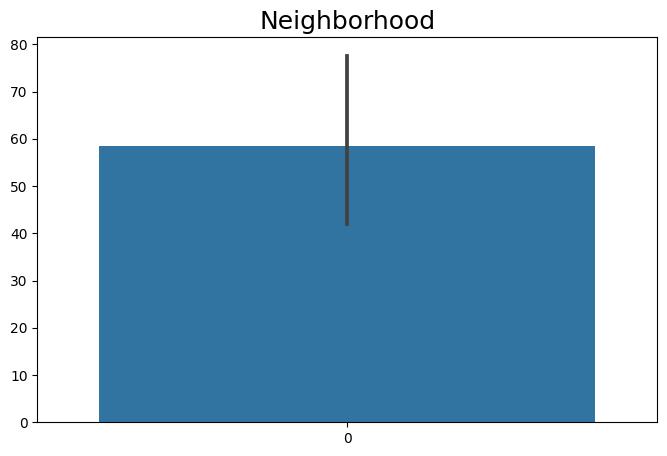

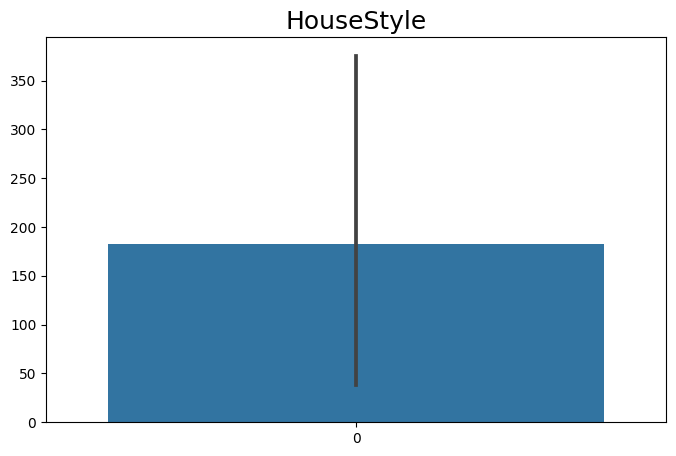

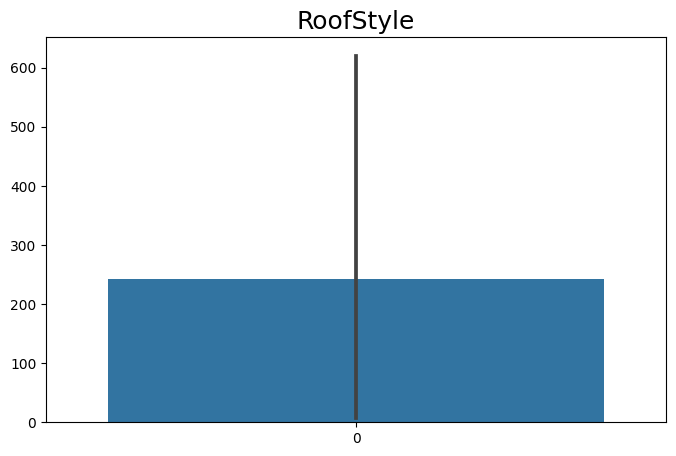

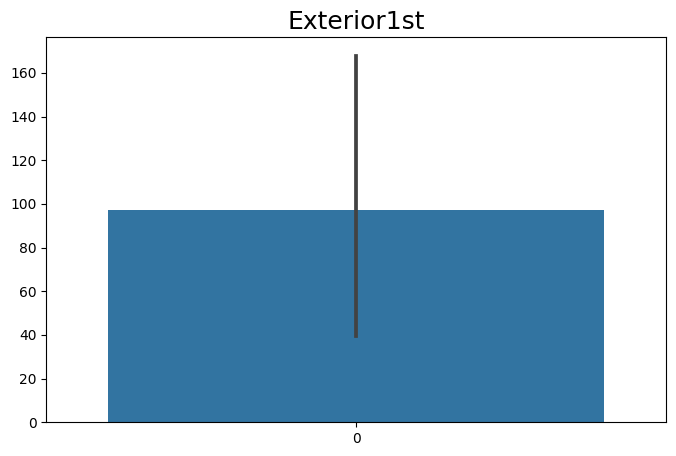

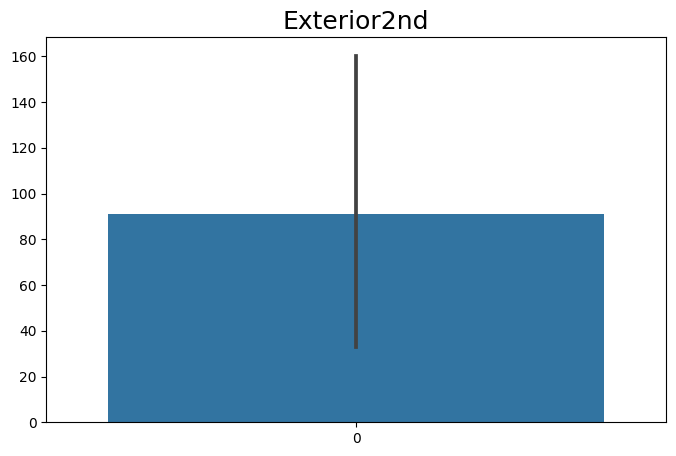

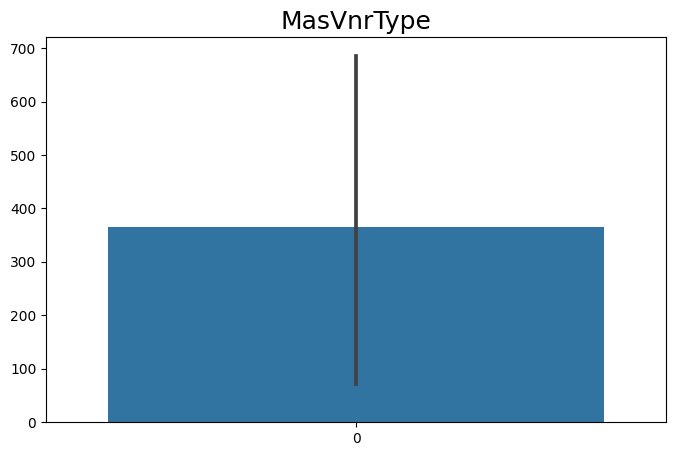

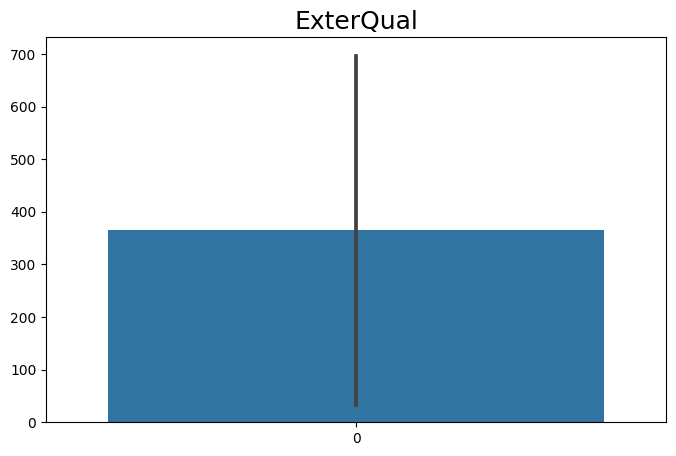

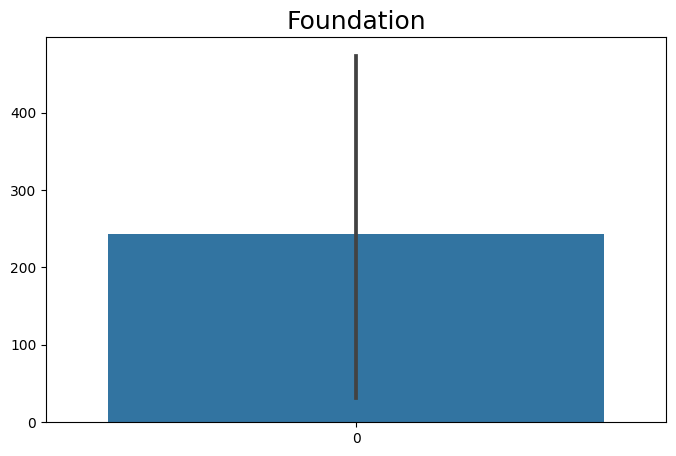

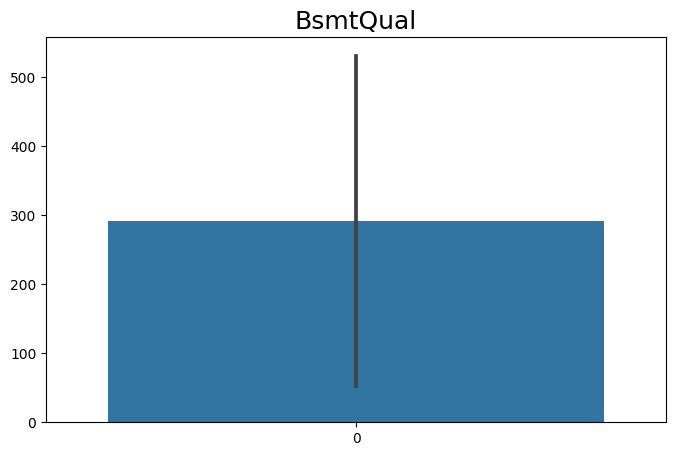

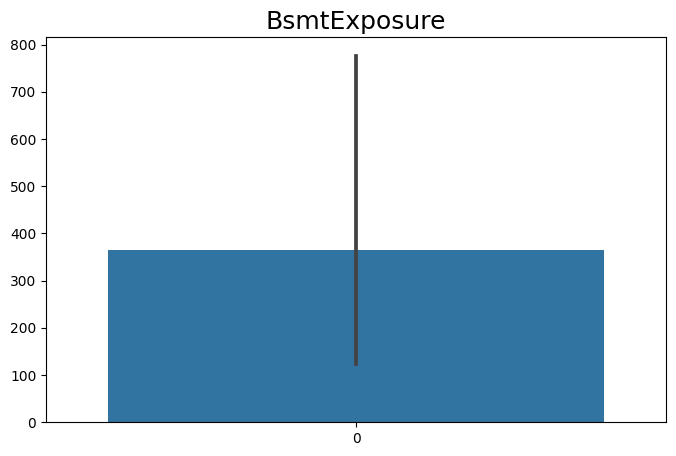

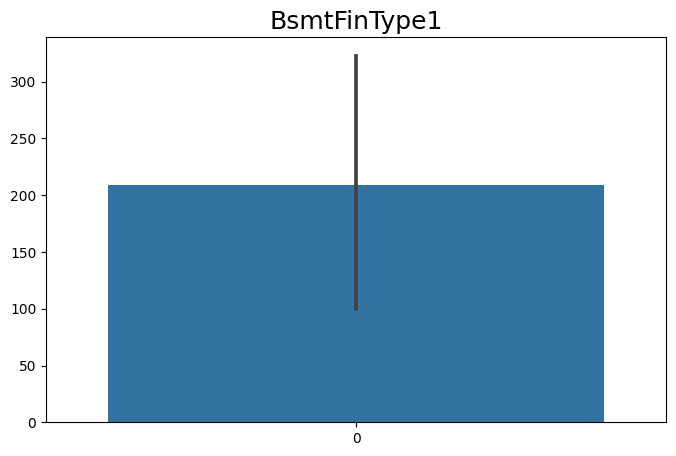

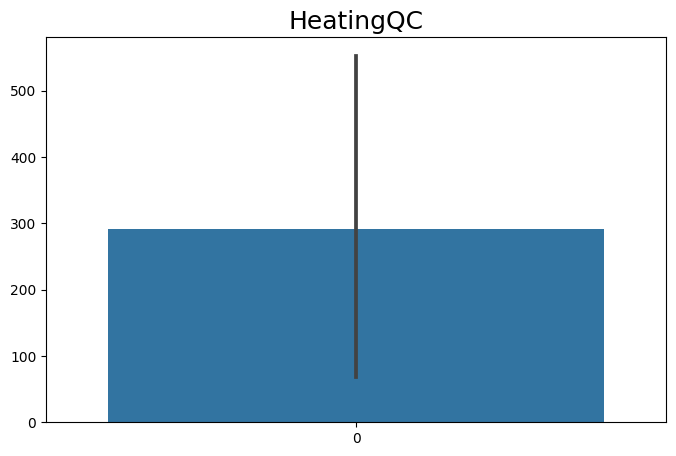

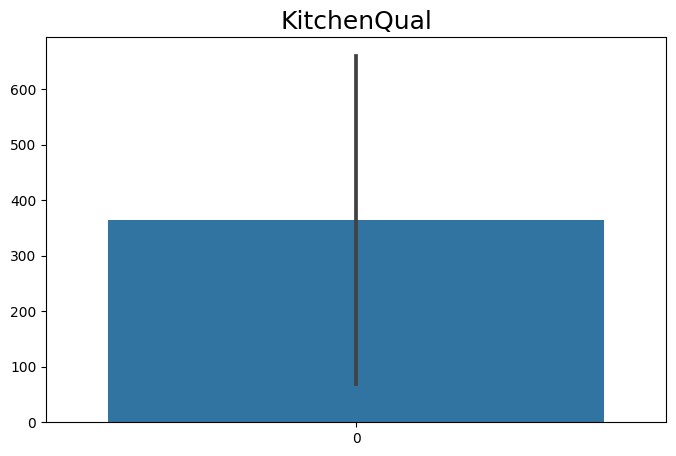

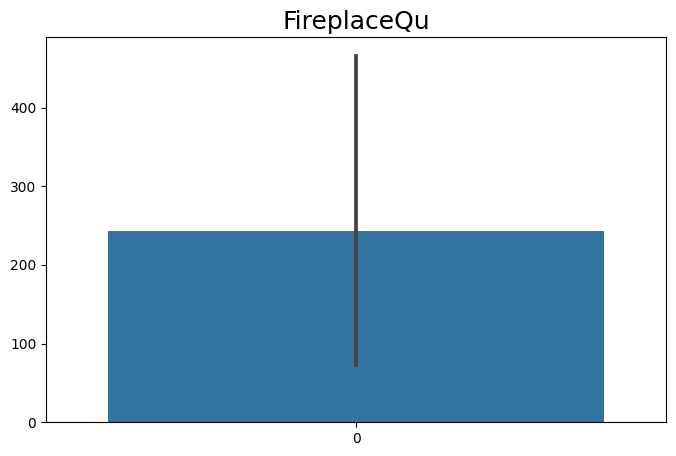

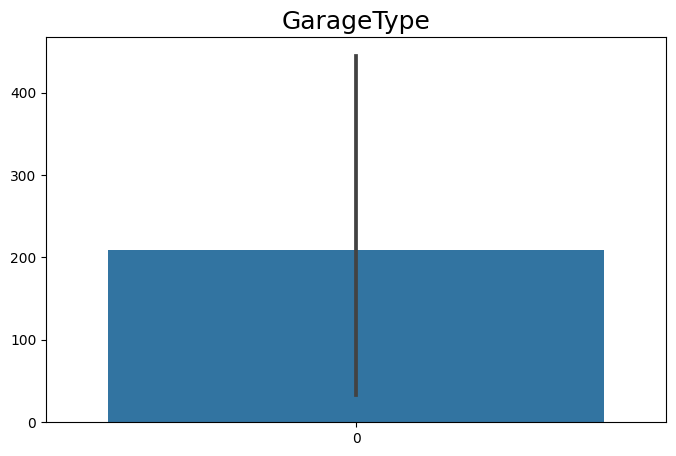

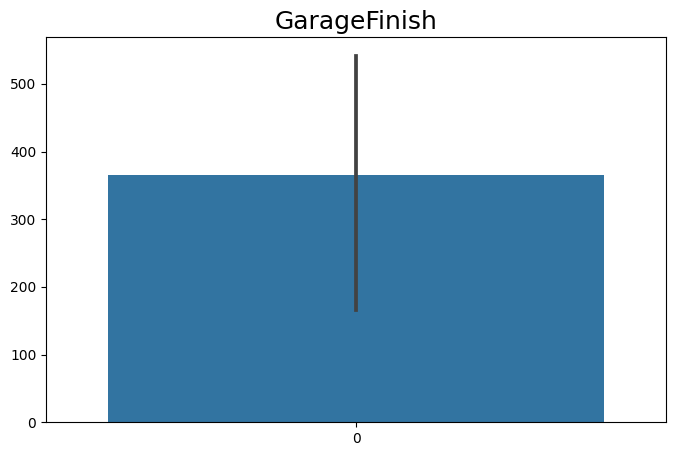

In [ ]:
## Visualizing the levels of categorical columns using bar plots
for col in df_cat.columns:
    plt.figure(figsize=(8,5))
    plt.title(col, fontdict={'fontsize': 18})
    sns.barplot(df_cat[col].value_counts())
    plt.show()

create dummy data


In [ ]:
df_cat_dummy = pd.get_dummies(df_cat, drop_first=True)
df_cat_dummy.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
0            0            0            1            0             0   
1            0            0            1            0             0   
2            0            0            1            0             0   
3            0            0            1            0             0   
4            0            0            1            0             0   

   LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  \
0             0             1                  0              0   
1             0             1                  0              1   
2             0             0                  0              0   
3             0             0                  0              0   
4             0             0                  0              1   

   LotConfig_FR3  ...  FireplaceQu_TA  GarageType_Attchd  GarageType_Basment  \
0              0  ...               0                  1                   0   
1              0  ...               1                  1                   0   
2              0  ...               1                  1                   0   
3              0  ...               0                  0                   0   
4              0  ...               1                  1                   0   

   GarageType_BuiltIn  GarageType_CarPort  GarageType_Detchd  GarageType_NA  \
0                   0                   0                  0              0   
1                   0                   0                  0              0   
2                   0                   0                  0              0   
3                   0                   0                  1              0   
4                   0                   0                  0              0   

   GarageFinish_NA  GarageFinish_RFn  GarageFinish_Unf  
0                0                 1                 0  
1                0                 1                 0  
2                0                 1                 0  
3                0                 0                 1  
4                0                 1                 0  

[5 rows x 121 columns]

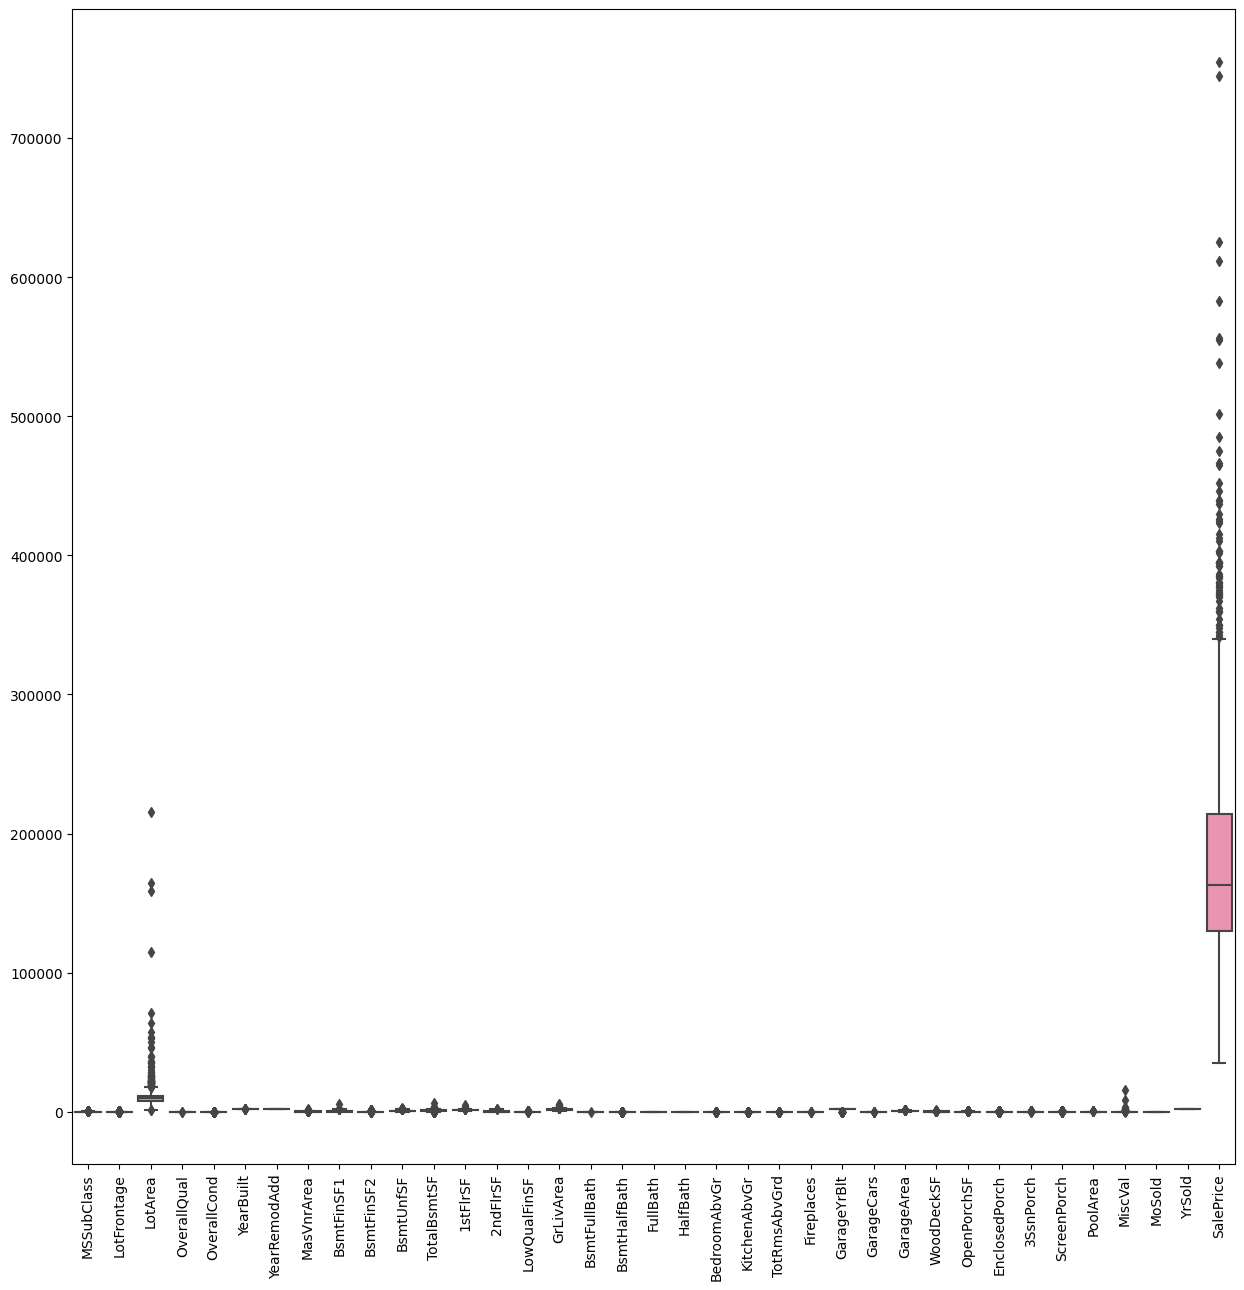

In [ ]:
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=df_num);

In [ ]:
## Remove the outliers
for col in df_num.columns:
    df_num[col][df_num[col] <= df_num[col].quantile(0.05)] = df_num[col].quantile(0.05)
    df_num[col][df_num[col] >= df_num[col].quantile(0.95)] = df_num[col].quantile(0.95)


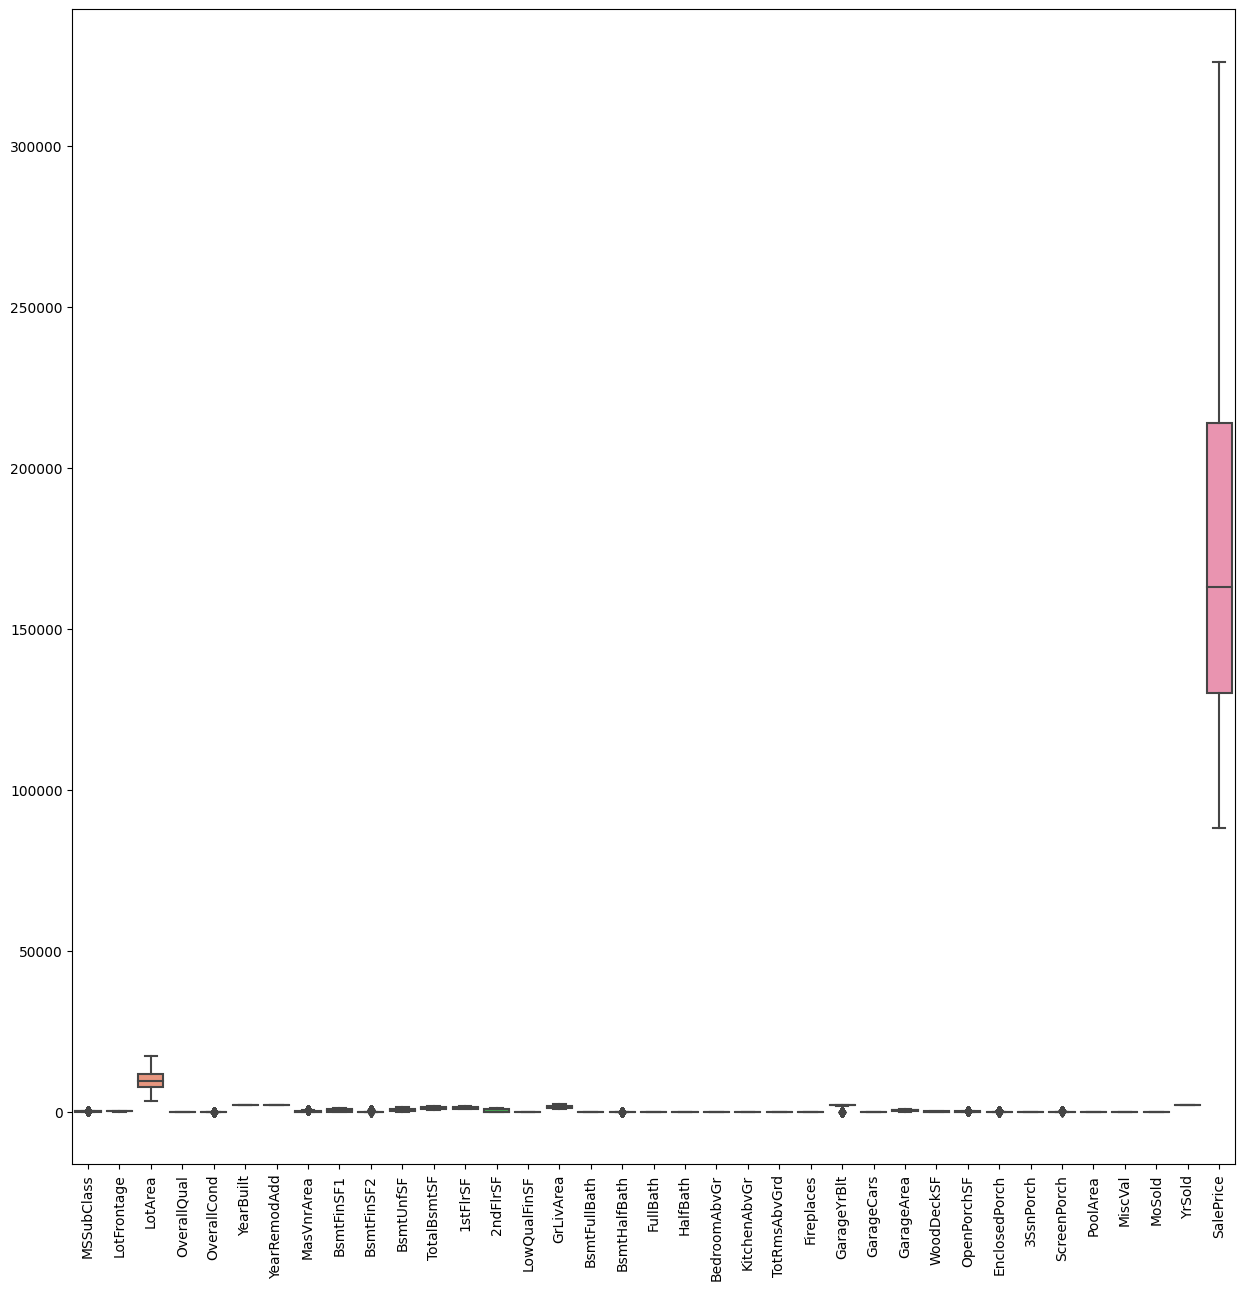

In [ ]:
## Check the boxplots again to see if outliers have been treated
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=df_num);

In [ ]:
data_df = pd.concat([df_num, df_cat_dummy], axis=1)


## View the first few rows of our dataframe
data_df.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0   8450.0            7            5       2003   
1          20         80.0   9600.0            6            8       1976   
2          60         68.0  11250.0            7            5       2001   
3          70         60.0   9550.0            7            5       1916   
4          60         84.0  14260.0            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  FireplaceQu_TA  \
0          2003       196.0         706         0.0  ...               0   
1          1976         0.0         978         0.0  ...               1   
2          2002       162.0         486         0.0  ...               1   
3          1970         0.0         216         0.0  ...               0   
4          2000       350.0         655         0.0  ...               1   

   GarageType_Attchd  GarageType_Basment  GarageType_BuiltIn  \
0                  1                   0                   0   
1                  1                   0                   0   
2                  1                   0                   0   
3                  0                   0                   0   
4                  1                   0                   0   

   GarageType_CarPort  GarageType_Detchd  GarageType_NA  GarageFinish_NA  \
0                   0                  0              0                0   
1                   0                  0              0                0   
2                   0                  0              0                0   
3                   0                  1              0                0   
4                   0                  0              0                0   

   GarageFinish_RFn  GarageFinish_Unf  
0                 1                 0  
1                 1                 0  
2                 1                 0  
3                 0                 1  
4                 1                 0  

[5 rows x 158 columns]

Training the  Data


In [ ]:
df_train,df_test = train_test_split(data_df,train_size=0.70,random_state=100)
print(df_train.shape)
print(df_test.shape)

(1021, 158)
(439, 158)


In [ ]:
X=data_df.drop(["SalePrice"], axis=1).copy()
X.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0   8450.0            7            5       2003   
1          20         80.0   9600.0            6            8       1976   
2          60         68.0  11250.0            7            5       2001   
3          70         60.0   9550.0            7            5       1916   
4          60         84.0  14260.0            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  FireplaceQu_TA  \
0          2003       196.0         706         0.0  ...               0   
1          1976         0.0         978         0.0  ...               1   
2          2002       162.0         486         0.0  ...               1   
3          1970         0.0         216         0.0  ...               0   
4          2000       350.0         655         0.0  ...               1   

   GarageType_Attchd  GarageType_Basment  GarageType_BuiltIn  \
0                  1                   0                   0   
1                  1                   0                   0   
2                  1                   0                   0   
3                  0                   0                   0   
4                  1                   0                   0   

   GarageType_CarPort  GarageType_Detchd  GarageType_NA  GarageFinish_NA  \
0                   0                  0              0                0   
1                   0                  0              0                0   
2                   0                  0              0                0   
3                   0                  1              0                0   
4                   0                  0              0                0   

   GarageFinish_RFn  GarageFinish_Unf  
0                 1                 0  
1                 1                 0  
2                 1                 0  
3                 0                 1  
4                 1                 0  

[5 rows x 157 columns]

In [ ]:
#cnt is out Target/dependent Variable
y_train = df_train.pop('SalePrice')
X_train = df_train

In [ ]:
## Splitting X and y into 80% train data and 20% test data
#X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.80,random_state=100, shuffle=True)
print(X_train.shape)

print(y_train.shape)

(1021, 157)
(1021,)


In [ ]:
X_train.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
318           60         90.0   9900.0            7            5       1993   
239           50         52.0   8741.0            6            4       1945   
986           50         59.0   5310.0            6            8       1916   
1416         160         60.0  11340.0            4            6       1916   
390           50         50.0   8405.0            5            8       1916   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  FireplaceQu_TA  \
318           1993       256.0         987         0.0  ...               1   
239           1950         0.0          94         0.0  ...               0   
986           2003         0.0           0         0.0  ...               0   
1416          1950         0.0           0         0.0  ...               0   
390           1950         0.0         241       391.0  ...               0   

      GarageType_Attchd  GarageType_Basment  GarageType_BuiltIn  \
318                   1                   0                   0   
239                   0                   0                   0   
986                   1                   0                   0   
1416                  0                   0                   0   
390                   0                   0                   0   

      GarageType_CarPort  GarageType_Detchd  GarageType_NA  GarageFinish_NA  \
318                    0                  0              0                0   
239                    0                  1              0                0   
986                    0                  0              0                0   
1416                   0                  1              0                0   
390                    0                  1              0                0   

      GarageFinish_RFn  GarageFinish_Unf  
318                  1                 0  
239                  0                 1  
986                  0                 1  
1416                 0                 1  
390                  0                 1  

[5 rows x 157 columns]

In [ ]:
## Create a list of numerical columns to be scaled
num_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
num_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [ ]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [ ]:
## Create a scaling instance
scaler = StandardScaler()

## Scale the numerical columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [ ]:
X_train[num_cols].head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
318     0.058156     1.272673  0.072066     0.755435    -0.586518   0.729049   
239    -0.186194    -1.008696 -0.263598    -0.049679    -1.577967  -0.922864   
986    -0.186194    -0.588444 -1.257269    -0.049679     2.387829  -1.920894   
1416    2.501658    -0.528408  0.489112    -1.659906     0.404931  -1.920894   
390    -0.186194    -1.128768 -0.360909    -0.854792     2.387829  -1.920894   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  GarageArea  \
318       0.394412    1.158620    1.339452   -0.332312  ...    0.938924   
239      -1.701941   -0.650325   -0.824572   -0.332312  ...   -1.232541   
986       0.881936   -0.650325   -1.052363   -0.332312  ...   -1.058226   
1416     -1.701941   -0.650325   -1.052363   -0.332312  ...    0.460804   
390      -1.701941   -0.650325   -0.468344    3.438955  ...   -0.415751   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
318     2.269708     0.312068       2.394338        0.0    -0.285455   
239    -0.803352     1.809398      -0.391007        0.0    -0.285455   
986     2.269708    -0.810930      -0.391007        0.0    -0.285455   
1416   -0.803352    -0.810930       1.814058        0.0    -0.285455   
390    -0.803352     1.622232       1.775373        0.0    -0.285455   

      PoolArea  MiscVal    MoSold    YrSold  
318        0.0      0.0 -0.885962  0.882411  
239        0.0      0.0 -0.885962  1.629460  
986        0.0      0.0 -0.112497 -1.358737  
1416       0.0      0.0 -0.885962  1.629460  
390        0.0      0.0 -0.885962  0.135361  

[5 rows x 36 columns]

In [ ]:
X_train.dtypes

MSSubClass           float64
LotFrontage          float64
LotArea              float64
OverallQual          float64
OverallCond          float64
                      ...   
GarageType_Detchd      uint8
GarageType_NA          uint8
GarageFinish_NA        uint8
GarageFinish_RFn       uint8
GarageFinish_Unf       uint8
Length: 157, dtype: object

In [ ]:
data_df.isnull().sum().sum()

0

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=35)
rfe = rfe.fit(X_train,y_train)

In [ ]:
#adding a constant variable
X_train = sm.add_constant(X_train)

In [ ]:
lm = sm.OLS(y_train,X_train).fit()  #Running the linear Model

In [ ]:
#Get the Summary of Linear Model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     77.52
Date:                Wed, 28 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:10:58   Log-Likelihood:                -11412.
No. Observations:                1021   AIC:                         2.312e+04
Df Residuals:                     873   BIC:                         2.385e+04
Df Model:                         147                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.481e+05   2.29e+04      6.465      0.000    1.03e+05    1.93e+05
MSSubClass           -5292.1921   1046.403     -5.058      0.000   -7345.952   -3238.433
LotFrontage           -114.3765    925.988     -0.124      0.902   -1931.800    1703.047
LotArea               4757.2993   1074.029      4.429      0.000    2649.319    6865.280
OverallQual           1.074e+04   1304.442      8.234      0.000    8179.961    1.33e+04
OverallCond           6130.7231    876.166      6.997      0.000    4411.086    7850.360
YearBuilt             3937.3717   2335.223      1.686      0.092    -645.936    8520.680
YearRemodAdd          2968.2206   1072.696      2.767      0.006     862.856    5073.585
MasVnrArea             161.3784   1150.757      0.140      0.889   -2097.195    2419.952
BsmtFinSF1           -4942.1022   2497.506     -1.979      0.048   -9843.919     -40.285
BsmtFinSF2           -3496.0867   1084.727     -3.223      0.001   -5625.064   -1367.109
BsmtUnfSF            -9477.1703   2552.949     -3.712      0.000   -1.45e+04   -4466.535
TotalBsmtSF           1.712e+04   2650.435      6.459      0.000    1.19e+04    2.23e+04
1stFlrSF             -5846.9136   2906.506     -2.012      0.045   -1.16e+04    -142.358
2ndFlrSF              3756.0721   3328.146      1.129      0.259   -2776.030    1.03e+04
LowQualFinSF           1.28e-09   1.49e-09      0.858      0.391   -1.65e-09    4.21e-09
GrLivArea             2.351e+04   3365.846      6.984      0.000    1.69e+04    3.01e+04
BsmtFullBath          1884.3228    942.958      1.998      0.046      33.594    3735.052
BsmtHalfBath          -177.0524    686.524     -0.258      0.797   -1524.483    1170.378
FullBath              -163.7190   1153.588     -0.142      0.887   -2427.849    2100.411
HalfBath               634.3561   1022.548      0.620      0.535   -1372.583    2641.296
BedroomAbvGr          -908.7766   1011.409     -0.899      0.369   -2893.854    1076.301
KitchenAbvGr          -1.01e-09   1.18e-09     -0.854      0.393   -3.33e-09    1.31e-09
TotRmsAbvGrd         -2113.9460   1363.629     -1.550      0.121   -4790.321     562.429
Fireplaces             803.5667   1661.308      0.484      0.629   -2457.057    4064.191
GarageYrBlt           2.121e+04   2.62e+04      0.810      0.418   -3.02e+04    7.26e+04
GarageCars            1379.2569   1797.016      0.768      0.443   -2147.720    4906.234
GarageArea            5793.6919   1835.977      3.156      0.002    2190.248    9397.136
WoodDeckSF            1751.7749    707.766      2.475      0.014     362.654    3140.896
OpenPorchSF            273.0020    732.182      0.373      0.709   -1164.041    1710.045
EnclosedPorch           97.8522    749.756      0.131      0.896   -1373.683    1569.387
3SsnPorch            -5.326e-10   5.83e-10     -0.913    

Ridge Regressiondatadata_dfdata_dfdataddDDDAsdwwedsdaddaacxxD

In [ ]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low,
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 10.0}


In [ ]:
alpha = 10
ridge = Ridge(alpha=alpha)
# Fit the model on Training data
ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 0.00000000e+00 -5.15774523e+03  2.34590552e+02  4.14924544e+03
  1.22453662e+04  6.25874347e+03  6.69113719e+03  3.09749123e+03
  1.30233872e+03 -5.52609886e+02 -2.06262756e+03 -5.45933663e+03
  1.36178744e+04 -2.04180141e+03  5.25059701e+03  0.00000000e+00
  1.91615364e+04  1.94971505e+03 -5.50090484e+02 -3.51445489e+02
  7.79151198e+02 -1.01848077e+03  0.00000000e+00 -1.57250234e+03
  1.27546034e+03 -2.06269301e+03  2.09080278e+03  5.42352546e+03
  1.80669058e+03  5.87395371e+02  1.47464768e+02  0.00000000e+00
  2.50849358e+02  0.00000000e+00  0.00000000e+00  5.08917370e+02
 -4.49242463e+02  6.01820658e+03  2.25742312e+03  3.46820623e+03
 -2.97650068e+03 -6.08528492e+02 -6.20169559e+03  1.44113219e+02
  5.79765044e+03 -3.93301192e+03 -1.59645707e+03  2.19449477e+03
  2.86270602e+02  2.38863337e+01  1.78149802e+03  4.96430549e+03
 -5.14521020e+03  1.56102198e+04 -1.34144517e+04 -3.22135574e+03
 -3.65250916e+02 -2.63560877e+03 -1.15211500e+04 -1.08290014e+04
  2.37354756e+03 -9.02170

In [ ]:
## Create a dataframe of ridge cross validation results
model_cv_results= pd.DataFrame(model_cv.cv_results_)
model_cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.021190      0.003201         0.007116        0.002296      0.0001   
1        0.017208      0.006364         0.006212        0.002083       0.001   
2        0.010139      0.000261         0.004369        0.000093        0.01   
3        0.017080      0.005535         0.005998        0.002032        0.05   
4        0.022977      0.003615         0.008863        0.000438         0.1   
5        0.021619      0.000813         0.008684        0.000205         0.2   
6        0.016222      0.005180         0.006324        0.002562         0.3   
7        0.009896      0.000107         0.004257        0.000137         0.4   
8        0.016672      0.013927         0.006165        0.003887         0.5   
9        0.009856      0.000092         0.004256        0.000039         0.6   
10       0.018929      0.004487         0.008772        0.002637         0.7   
11       0.010213      0.000507         0.004611        0.000473         0.8   
12       0.019773      0.008658         0.009399        0.003351         0.9   
13       0.016941      0.005507         0.007738        0.001730         1.0   
14       0.010279      0.000928         0.006495        0.004306         2.0   
15       0.010066      0.000131         0.004320        0.000092         3.0   
16       0.019609      0.002550         0.007815        0.001873         4.0   
17       0.011210      0.001673         0.004380        0.000028         5.0   
18       0.014330      0.005243         0.005284        0.001827         6.0   
19       0.024049      0.006095         0.008407        0.002524         7.0   
20       0.021944      0.001360         0.008350        0.000879         8.0   
21       0.014882      0.006748         0.005255        0.001893         9.0   
22       0.009985      0.000116         0.004264        0.000045        10.0   
23       0.018451      0.004248         0.009224        0.003815          20   
24       0.010943      0.001860         0.004335        0.000092          50   
25       0.015394      0.005397         0.007603        0.003178         100   
26       0.021286      0.000588         0.008688        0.000146         500   
27       0.020990      0.000992         0.007558        0.001755        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}      -13413.274353      -16737.643532   
1    {'alpha': 0.001}      -13413.502731      -16736.474994   
2     {'alpha': 0.01}      -13414.163385      -16725.303544   
3     {'alpha': 0.05}      -13403.836397      -16682.591613   
4      {'alpha': 0.1}      -13386.509757      -16638.647097   
5      {'alpha': 0.2}      -13353.114867      -16567.698551   
6      {'alpha': 0.3}      -13322.297878      -16512.147402   
7      {'alpha': 0.4}      -13293.611815      -16470.097442   
8      {'alpha': 0.5}      -13266.506867      -16438.489637   
9      {'alpha': 0.6}      -13240.801455      -16410.287866   
10     {'alpha': 0.7}      -13216.338878      -16384.034103   
11     {'alpha': 0.8}      -13196.391366      -16359.745641   
12     {'alpha': 0.9}      -13178.974046      -16337.489949   
13     {'alpha': 1.0}      -13162.099672      -16317.287343   
14     {'alpha': 2.0}      -13059.980268      -16160.914561   
15     {'alpha': 3.0}      -12986.709242      -16062.438633   
16     {'alpha': 4.0}      -12944.140316      -15997.485420   
17     {'alpha': 5.0}      -12921.713452      -15955.969863   
18     {'alpha': 6.0}      -12928.243590      -15926.288017   
19     {'alpha': 7.0}      -12941.026182      -15901.970917   
20     {'alpha': 8.0}      -12951.145109      -15892.315895   
21     {'alpha': 9.0}      -12959.149103      -15888.092622   
22    {'alpha': 10.0}      -12965.444814      -15885.067838   
23      {'alpha': 20}      -13011.109117      -15986.768065   
24      {'alpha': 50}      -13085.954079      -16395.418139   
25     {'alpha': 100}      -13357.719623     

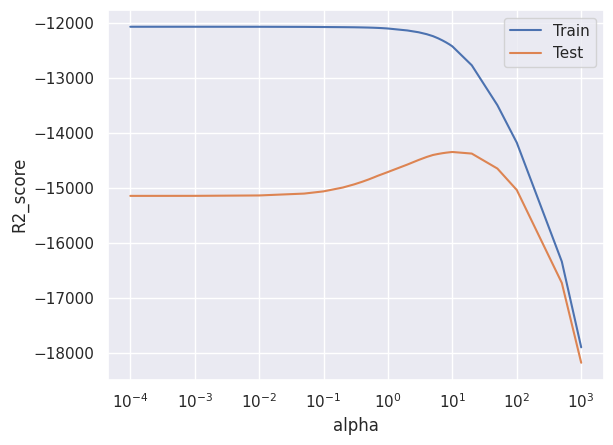

In [ ]:
plt.plot(model_cv_results['param_alpha'], model_cv_results['mean_train_score'], label='Train')
plt.plot(model_cv_results['param_alpha'], model_cv_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

The value of alpha increases, we see a decrease in train error and an initial increase followed by decrease in test error.
From graph also, looks like optimal value of alpha is 10.

In [ ]:
8##Lasso Regression

8



*   List item
*   List item



In [ ]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation

lassoCV = GridSearchCV(estimator = lasso,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = 5,
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)
lassoCV.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
## View the optimal value of alpha
lassoCV.best_params_

{'alpha': 50}

In [ ]:
lassoCV.cv_results_

{'mean_fit_time': array([0.21939702, 0.18125863, 0.18725629, 0.19221482, 0.18658848,
        0.19061894, 0.18832846, 0.19810853, 0.18848467, 0.20402937,
        0.20243692, 0.18844352, 0.18434572, 0.17622709, 0.15738931,
        0.18895283, 0.15350471, 0.13836994, 0.10847535, 0.08108044,
        0.06661558, 0.05918679, 0.06016216, 0.04557719, 0.04597154,
        0.03754725, 0.01898398, 0.01673369]),
 'std_fit_time': array([0.02844749, 0.02534625, 0.01224343, 0.01891948, 0.01142035,
        0.01621096, 0.01193653, 0.01564288, 0.01806351, 0.01678583,
        0.01872462, 0.01352403, 0.01520506, 0.0126707 , 0.02292085,
        0.00996426, 0.02135692, 0.03540072, 0.02130685, 0.01167219,
        0.00753911, 0.00634705, 0.0049892 , 0.0037244 , 0.01771978,
        0.00930788, 0.00422335, 0.00463277]),
 'mean_score_time': array([0.00987287, 0.00573487, 0.00622382, 0.00753708, 0.00582166,
        0.00805578, 0.00584302, 0.00626822, 0.00590277, 0.00620017,
        0.00558496, 0.00638885, 0.006121

In [ ]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =100

lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)

Lasso(alpha=100)

In [ ]:
lasso.coef_

array([     0.        ,  -5216.24108299,    157.64047757,   3927.28719419,
        12702.09001707,   6418.39095721,   8400.41849314,   3176.68797657,
          962.32200783,    706.03264663,  -1671.598781  ,  -4116.18593053,
        13316.27731728,  -2278.93286306,   2803.50637141,      0.        ,
        20067.89138616,   2282.51551995,   -330.67301019,   -725.04964972,
          849.88605654,  -1118.96615937,      0.        ,  -1412.17383671,
         1862.34693248,  -1391.83842094,   1851.31177793,   5086.64345865,
         1922.11333777,    536.69644399,     -0.        ,      0.        ,
          376.94871264,      0.        ,      0.        ,    431.81404869,
         -396.2465878 ,      0.        ,      0.        ,    559.21231627,
        -4392.28716664,     -0.        ,     -0.        ,      0.        ,
         4524.1894364 ,   -501.65975656,     -0.        ,   1806.14389113,
            0.        ,     -0.        ,      0.        ,   3210.15734099,
        -1480.73327799,  

In [ ]:
alpha =200

lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)

Lasso(alpha=200)

In [ ]:
lasso.coef_

array([    0.        , -4955.64517282,     0.        ,  3922.71365741,
       13841.17568789,  6092.99012416,  8686.31232194,  3087.98280706,
        1130.21807511,  2115.02404473, -1140.82003634, -2620.88560665,
       11413.81000571,   -56.62122275,  3255.81940757,     0.        ,
       18573.18655454,  2270.24424855,  -226.18444321,  -653.81752535,
        1099.38622449, -1375.97707177,     0.        ,  -889.87984367,
        2909.19550438, -1332.23203683,  1842.19913159,  4902.40318517,
        1908.31938461,   578.41682901,     0.        ,     0.        ,
         311.43419267,     0.        ,     0.        ,   405.40234516,
        -293.09892553,     0.        ,     0.        ,     0.        ,
       -3802.53336033,    -0.        ,    -0.        ,    -0.        ,
        2626.67453526,    -0.        ,    -0.        ,   957.33356306,
           0.        ,    -0.        ,     0.        ,     0.        ,
        -312.81046758, 14862.58322954, -7849.01198581,    -0.        ,
      

In [ ]:
y_pred_train = lasso.predict(X_train)
#y_pred_test = lasso.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

#r2_test_lr = r2_score(y_test, y_pred_test)
#print(r2_test_lr)

0.9210212714443634


ValueError                                Traceback (most recent call last)
<ipython-input-460-50e915fb683a> in <cell line: 2>()
      1 y_pred_train = lasso.predict(X_train)
----> 2 y_pred_test = lasso.predict(X_test)
      3
      4 r2_train_lr = r2_score(y_train, y_pred_train)
      5 print(r2_train_lr)

4 frames
/usr/local/lib/python3.10/dist-packages/sklearn/base.py in _check_feature_names(self, X, reset)
    479                 )
    480
--> 481             raise ValueError(message)
    482
    483     def _validate_data(

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- const

In [ ]:
lassoCV_results= pd.DataFrame(lassoCV.cv_results_)
lassoCV_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.219397      0.028447         0.009873        0.006324      0.0001   
1        0.181259      0.025346         0.005735        0.000579       0.001   
2        0.187256      0.012243         0.006224        0.001474        0.01   
3        0.192215      0.018919         0.007537        0.003012        0.05   
4        0.186588      0.011420         0.005822        0.000278         0.1   
5        0.190619      0.016211         0.008056        0.003893         0.2   
6        0.188328      0.011937         0.005843        0.000110         0.3   
7        0.198109      0.015643         0.006268        0.000578         0.4   
8        0.188485      0.018064         0.005903        0.000195         0.5   
9        0.204029      0.016786         0.006200        0.000394         0.6   
10       0.202437      0.018725         0.005585        0.000532         0.7   
11       0.188444      0.013524         0.006389        0.000474         0.8   
12       0.184346      0.015205         0.006121        0.000296         0.9   
13       0.176227      0.012671         0.005850        0.000177         1.0   
14       0.157389      0.022921         0.006107        0.000343         2.0   
15       0.188953      0.009964         0.006237        0.001218         3.0   
16       0.153505      0.021357         0.005851        0.000245         4.0   
17       0.138370      0.035401         0.005477        0.000489         5.0   
18       0.108475      0.021307         0.005479        0.000443         6.0   
19       0.081080      0.011672         0.007769        0.004541         7.0   
20       0.066616      0.007539         0.005821        0.000079         8.0   
21       0.059187      0.006347         0.005364        0.000482         9.0   
22       0.060162      0.004989         0.005156        0.000424        10.0   
23       0.045577      0.003724         0.005790        0.000638          20   
24       0.045972      0.017720         0.005452        0.000364          50   
25       0.037547      0.009308         0.008999        0.004163         100   
26       0.018984      0.004223         0.007935        0.003846         500   
27       0.016734      0.004633         0.008760        0.003388        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}      -13421.733700      -16736.009369   
1    {'alpha': 0.001}      -13421.693446      -16735.953683   
2     {'alpha': 0.01}      -13421.291751      -16735.398184   
3     {'alpha': 0.05}      -13419.523051      -16732.930543   
4      {'alpha': 0.1}      -13417.337230      -16729.846058   
5      {'alpha': 0.2}      -13413.003485      -16723.677019   
6      {'alpha': 0.3}      -13408.681393      -16717.507538   
7      {'alpha': 0.4}      -13404.353908      -16711.338030   
8      {'alpha': 0.5}      -13400.359082      -16705.169500   
9      {'alpha': 0.6}      -13396.584187      -16699.002023   
10     {'alpha': 0.7}      -13392.810439      -16692.835490   
11     {'alpha': 0.8}      -13389.119245      -16686.670095   
12     {'alpha': 0.9}      -13385.087422      -16680.506290   
13     {'alpha': 1.0}      -13381.491644      -16674.337375   
14     {'alpha': 2.0}      -13345.576928      -16616.561135   
15     {'alpha': 3.0}      -13307.036289      -16564.024555   
16     {'alpha': 4.0}      -13280.543105      -16523.043102   
17     {'alpha': 5.0}      -13245.850685      -16485.146480   
18     {'alpha': 6.0}      -13212.380250      -16444.285677   
19     {'alpha': 7.0}      -13182.061726      -16404.138716   
20     {'alpha': 8.0}      -13150.705928      -16366.951229   
21     {'alpha': 9.0}      -13112.777042      -16330.263118   
22    {'alpha': 10.0}      -13074.782215      -16297.993515   
23      {'alpha': 20}      -12825.441383      -16099.153303   
24      {'alpha': 50}      -12766.280560      -15704.121653   
25     {'alpha': 100}      -12910.644606     

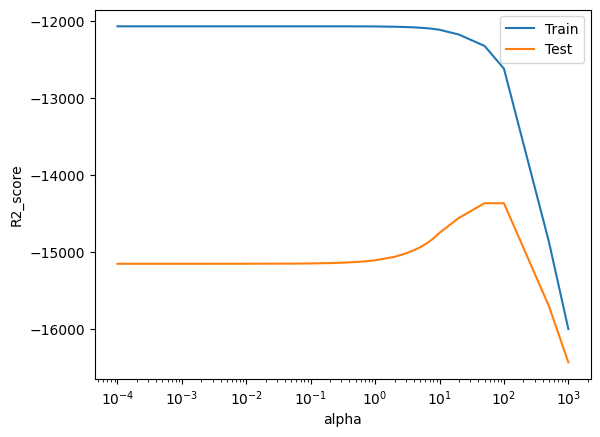

In [ ]:
## Plotting R2 score vs alpha values
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_train_score'], label='Train')
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

As the value of alpha increases, we see a decrease in both train and test error

Question: DROP 5 imp predictors

In [ ]:
#Drop 5 features
X_train_new = X_train.drop(['Neighborhood_NoRidge', 'Neighborhood_NridgHt', '2ndFlrSF', 'OverallQual'
                               , 'Neighborhood_Veenker'], axis=1)

In [ ]:
X_test_new = X_test.drop(['Neighborhood_NoRidge', 'Neighborhood_NridgHt', '2ndFlrSF', 'OverallQual'
                               , 'Neighborhood_Veenker'], axis=1)

In [ ]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)

model_cv.fit(X_train_new, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
print(model_cv.best_params_)

{'alpha': 50}


In [ ]:

alpha =500

lasso = Lasso(alpha=alpha)

lasso.fit(X_train_new, y_train)

Lasso(alpha=500)

In [ ]:
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

ValueError: ignored